
### This is titanic dataset , we want to deduce from the dataset who survived and who did not, we want to also see what class, age, relations and sex of survivors and the deceased using both visualisation and numerical figures to convey our discovery and also create an app for the prediction of survivors and deceased.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings 
warnings.filterwarnings('ignore')

In [2]:
tiatanic_df = pd.read_csv('tested.csv')

In [3]:
tiatanic_df

PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                                            ...     ...   ...    ...    ...   
413                            Spector, Mr. Woolf    male   NaN      0      0   
414                  Oliva y Ocana, Dona. Fermina  female  39.0      0      0   
415                  Saether, Mr. Simon Sivertsen    male  38.5      0      0   
416                           Ware, Mr. Frederick    male   NaN      0      0   
417                      Peter, Master. Michael J    male   NaN      1      1   

                 Ticket      Fare Cabin Embarked  
0                330911    7.8292   NaN        Q  
1                363272    7.0000   NaN        S  
2                240276    9.6875   NaN        Q  
3                315154    8.6625   NaN        S  
4               3101298   12.2875   NaN        S  
..                  ...       ...   ...      ...  
413           A.5. 3236    8.0500   NaN        S  
414            PC 17758  108.9000  C105        C  
415  SOTON/O.Q. 3101262    7.2500   NaN        S  
416              359309    8.0500   NaN        S  
417                2668   22.3583   NaN        C  

[418 rows x 12 columns]

In [4]:
tiatanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
tiatanic_df.describe(include = 'all')

PassengerId    Survived      Pclass              Name   Sex  \
count    418.000000  418.000000  418.000000               418   418   
unique          NaN         NaN         NaN               418     2   
top             NaN         NaN         NaN  Kelly, Mr. James  male   
freq            NaN         NaN         NaN                 1   266   
mean    1100.500000    0.363636    2.265550               NaN   NaN   
std      120.810458    0.481622    0.841838               NaN   NaN   
min      892.000000    0.000000    1.000000               NaN   NaN   
25%      996.250000    0.000000    1.000000               NaN   NaN   
50%     1100.500000    0.000000    3.000000               NaN   NaN   
75%     1204.750000    1.000000    3.000000               NaN   NaN   
max     1309.000000    1.000000    3.000000               NaN   NaN   

               Age       SibSp       Parch    Ticket        Fare  \
count   332.000000  418.000000  418.000000       418  417.000000   
unique         NaN         NaN         NaN       363         NaN   
top            NaN         NaN         NaN  PC 17608         NaN   
freq           NaN         NaN         NaN         5         NaN   
mean     30.272590    0.447368    0.392344       NaN   35.627188   
std      14.181209    0.896760    0.981429       NaN   55.907576   
min       0.170000    0.000000    0.000000       NaN    0.000000   
25%      21.000000    0.000000    0.000000       NaN    7.895800   
50%      27.000000    0.000000    0.000000       NaN   14.454200   
75%      39.000000    1.000000    0.000000       NaN   31.500000   
max      76.000000    8.000000    9.000000       NaN  512.329200   

                  Cabin Embarked  
count                91      418  
unique               76        3  
top     B57 B59 B63 B66        S  
freq                  3      270  
mean                NaN      NaN  
std                 NaN      NaN  
min                 NaN      NaN  
25%                 NaN      NaN  
50%                 NaN      NaN  
75%                 NaN      NaN  
max                 NaN      NaN

In [6]:
tiatanic_df.shape

(418, 12)

In [7]:
tiatanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

 ## Data cleaning

In [8]:
## checking for null value
tiatanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [3]:
## drop the less important  columns
tiatanic_df.drop(['Cabin', 'PassengerId', 'Ticket','Name'], inplace = True, axis = 1)
tiatanic_df

Survived  Pclass     Sex   Age  SibSp  Parch      Fare Embarked
0           0       3    male  34.5      0      0    7.8292        Q
1           1       3  female  47.0      1      0    7.0000        S
2           0       2    male  62.0      0      0    9.6875        Q
3           0       3    male  27.0      0      0    8.6625        S
4           1       3  female  22.0      1      1   12.2875        S
..        ...     ...     ...   ...    ...    ...       ...      ...
413         0       3    male   NaN      0      0    8.0500        S
414         1       1  female  39.0      0      0  108.9000        C
415         0       3    male  38.5      0      0    7.2500        S
416         0       3    male   NaN      0      0    8.0500        S
417         0       3    male   NaN      1      1   22.3583        C

[418 rows x 8 columns]

In [4]:
## we shall fill the age with it mean value
tiatanic_df['Age'] = tiatanic_df['Age'].fillna(tiatanic_df['Age'].mean())

In [11]:
tiatanic_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [5]:
## we shall check for duplicated value if any
tiatanic_df.duplicated().any()

True

In [7]:
tiatanic_df.drop_duplicates()

Survived  Pclass     Sex       Age  SibSp  Parch      Fare Embarked
0           0       3    male  34.50000      0      0    7.8292        Q
1           1       3  female  47.00000      1      0    7.0000        S
2           0       2    male  62.00000      0      0    9.6875        Q
3           0       3    male  27.00000      0      0    8.6625        S
4           1       3  female  22.00000      1      1   12.2875        S
..        ...     ...     ...       ...    ...    ...       ...      ...
411         1       1  female  37.00000      1      0   90.0000        Q
412         1       3  female  28.00000      0      0    7.7750        S
414         1       1  female  39.00000      0      0  108.9000        C
415         0       3    male  38.50000      0      0    7.2500        S
417         0       3    male  30.27259      1      1   22.3583        C

[380 rows x 8 columns]

## Data visualisation

In [13]:
tiatanic_df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

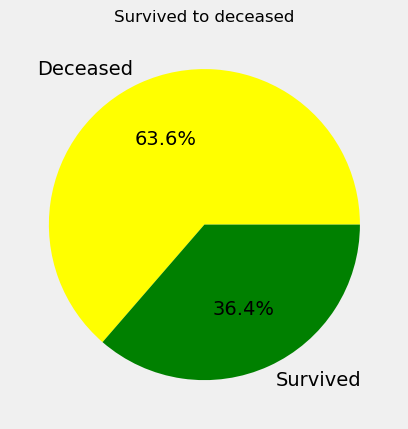

In [8]:
## visualisation of survivors to deceased using pie chart
tiatanic_df['Survived'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', labels=['Deceased','Survived'], colors = ['Yellow', 'Green'])
plt.title('Survived to deceased', fontsize=(12))
plt.ylabel('')
plt.show()

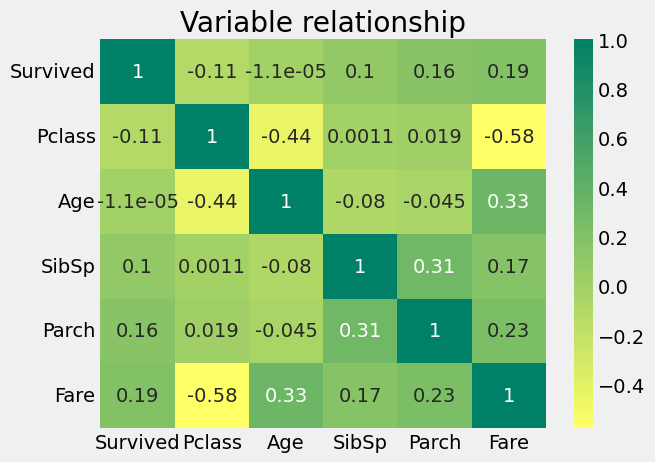

In [15]:
##we shall look at the correlation between variable to see relationships for  easy visualisation
df_corr = tiatanic_df.corr()
sns.heatmap(df_corr, annot = True, cmap= 'summer_r').set_title('Variable relationship')
plt.show()

In [16]:
##ploting in relation to age
## we will like to know th age range of our passengers for youngest to oldest
print("Youngest passenger's was", tiatanic_df['Age'].min())
print("Average passenger's age was", tiatanic_df['Age'].mean())
print("Oldest passenger's age was", tiatanic_df['Age'].max())

Youngest passenger's was 0.17
Average passenger's age was 30.272590361445783
Oldest passenger's age was 76.0


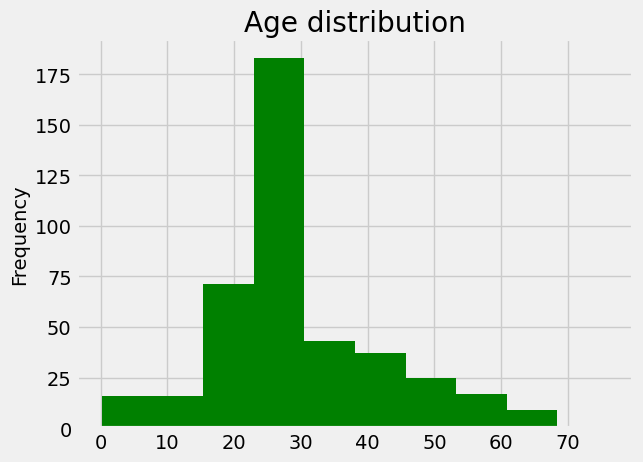

In [18]:
##using a histogram to see age distribution that boared the ship
tiatanic_df['Age'].plot.hist(color =['Green'])
plt.title('Age distribution')
plt.show()

In [19]:
tiatanic_df['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

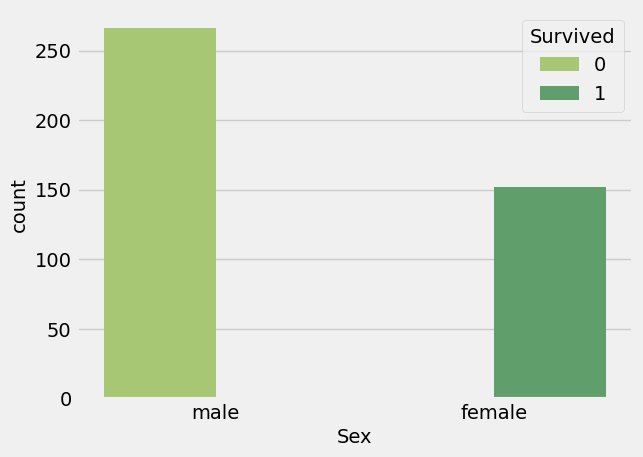

In [20]:
sns.countplot(data = tiatanic_df, x ='Sex', hue ='Survived', palette= ('summer_r'))

Text(0.5, 1.0, 'Fare Distribution')

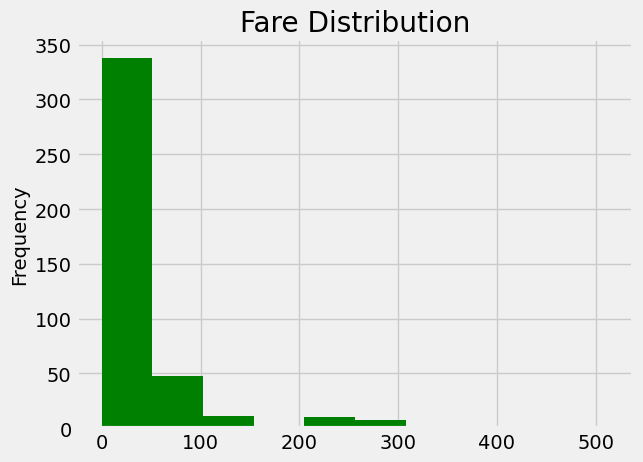

In [21]:
tiatanic_df['Fare'].plot.hist(color =['Green'])
plt.title('Fare Distribution')

In [22]:
tiatanic_df['SibSp'].value_counts()

0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: SibSp, dtype: int64

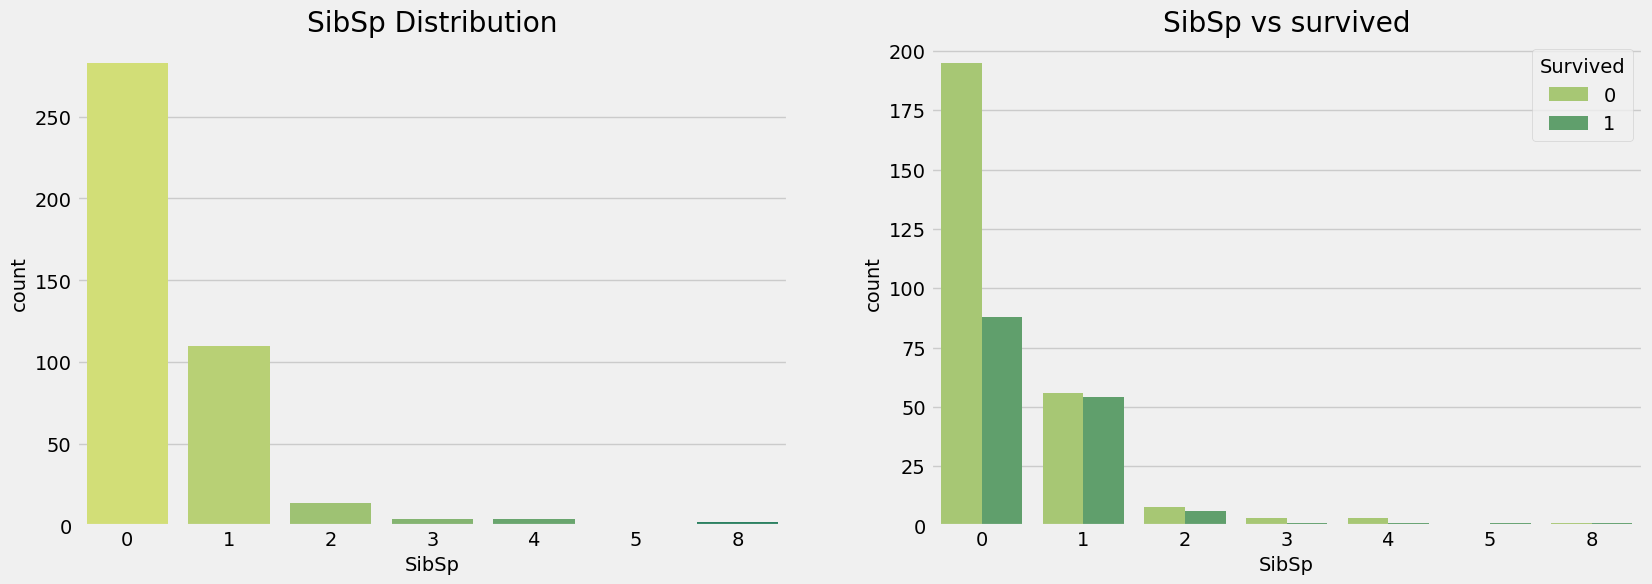

In [23]:
## visualising the data
f,ax=plt.subplots(1,2,figsize=(18,6))
sns.countplot(x='SibSp', data=tiatanic_df, ax=ax[0], palette ='summer_r')
ax[0].set_title('SibSp Distribution')
sns.countplot(x ='SibSp', hue = 'Survived', data = tiatanic_df, palette = 'summer_r', ax=ax[1])
ax[1].set_title('SibSp vs survived')
plt.show()

In [24]:
tiatanic_df['Pclass'].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

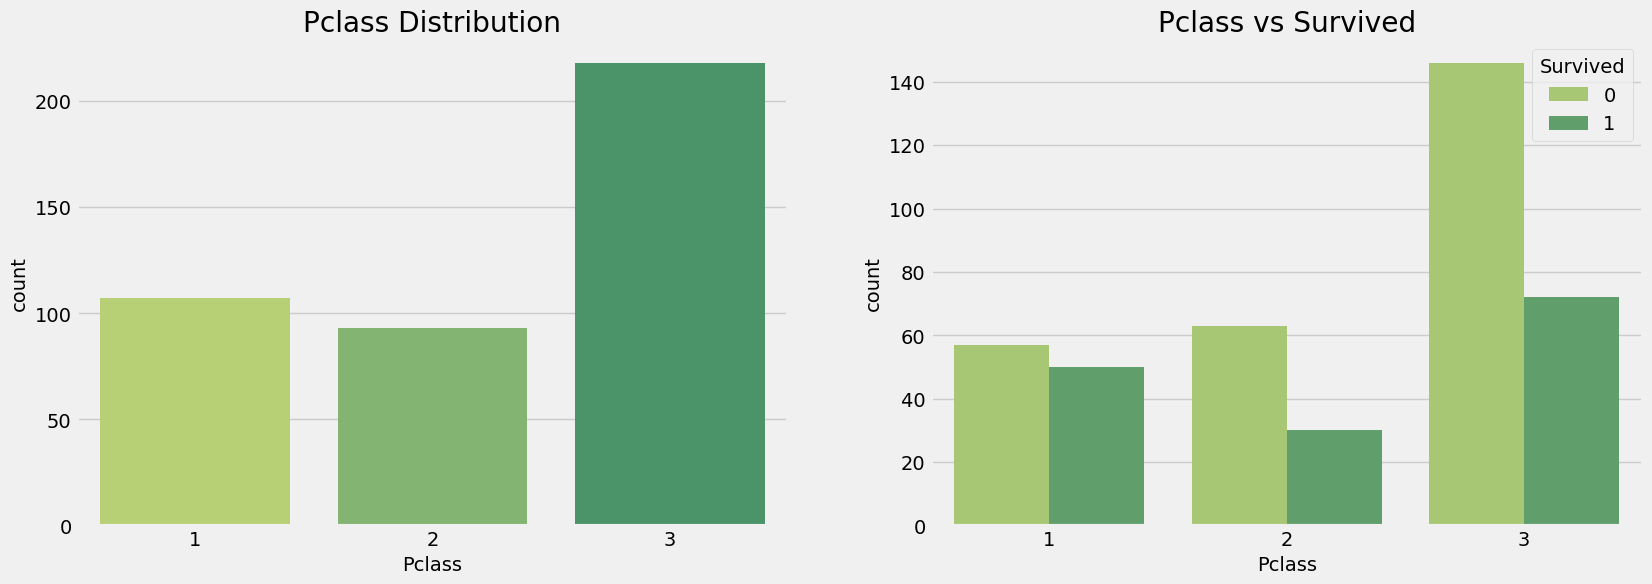

In [25]:
f, ax=plt.subplots(1,2,figsize=(18,6))
sns.countplot(x ='Pclass',data =tiatanic_df, ax =ax[0], palette='summer_r')
ax[0].set_title('Pclass Distribution')
sns.countplot(x = 'Pclass', data =tiatanic_df,hue='Survived', palette='summer_r', ax=ax[1])
ax[1].set_title('Pclass vs Survived')
plt.show()

In [26]:
pd.crosstab(tiatanic_df.Pclass, tiatanic_df.Survived).style.background_gradient('summer_r')

In [27]:
tiatanic_df['Parch'].value_counts()

0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: Parch, dtype: int64

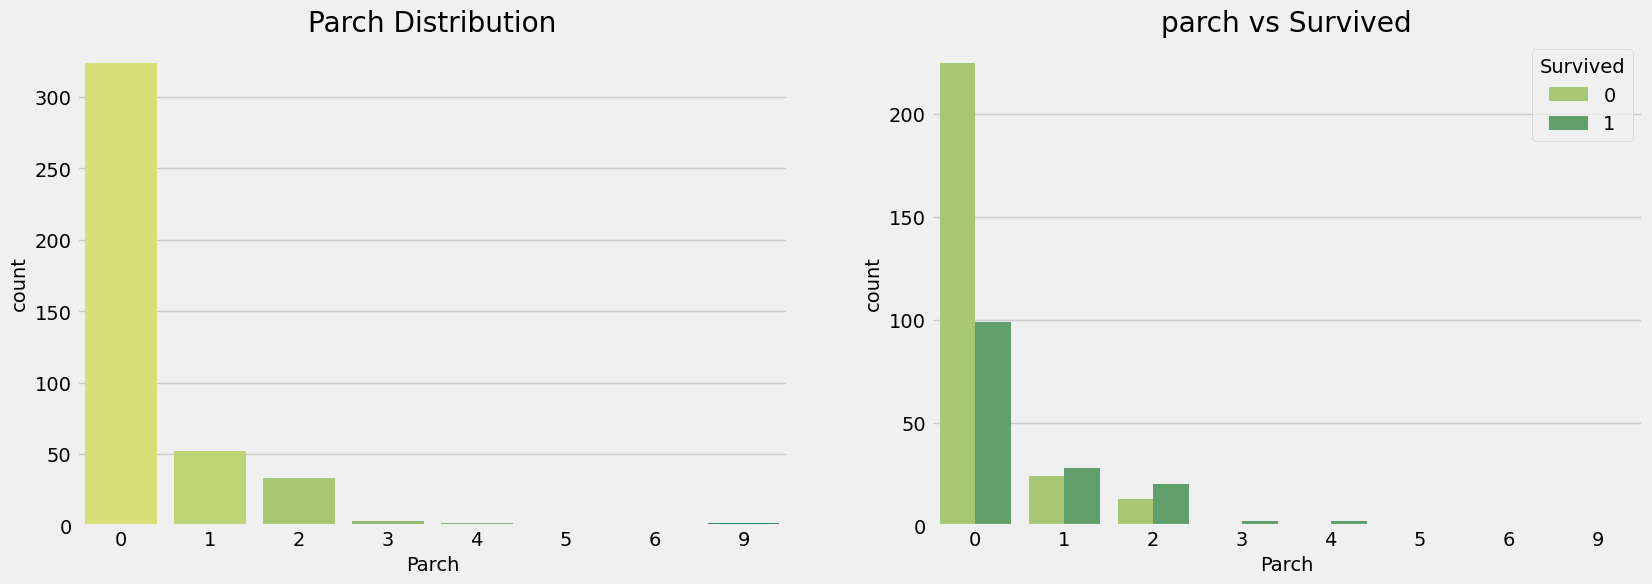

In [28]:
f,ax=plt.subplots(1,2,figsize=(18, 6))
sns.countplot(x = 'Parch', data = tiatanic_df, palette='summer_r', ax=ax[0])
ax[0].set_title('Parch Distribution')
sns.countplot(x ='Parch',hue='Survived',data=tiatanic_df, palette = 'summer_r',ax=ax[1])
ax[1].set_title('parch vs Survived')
plt.show()

In [29]:
tiatanic_df['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

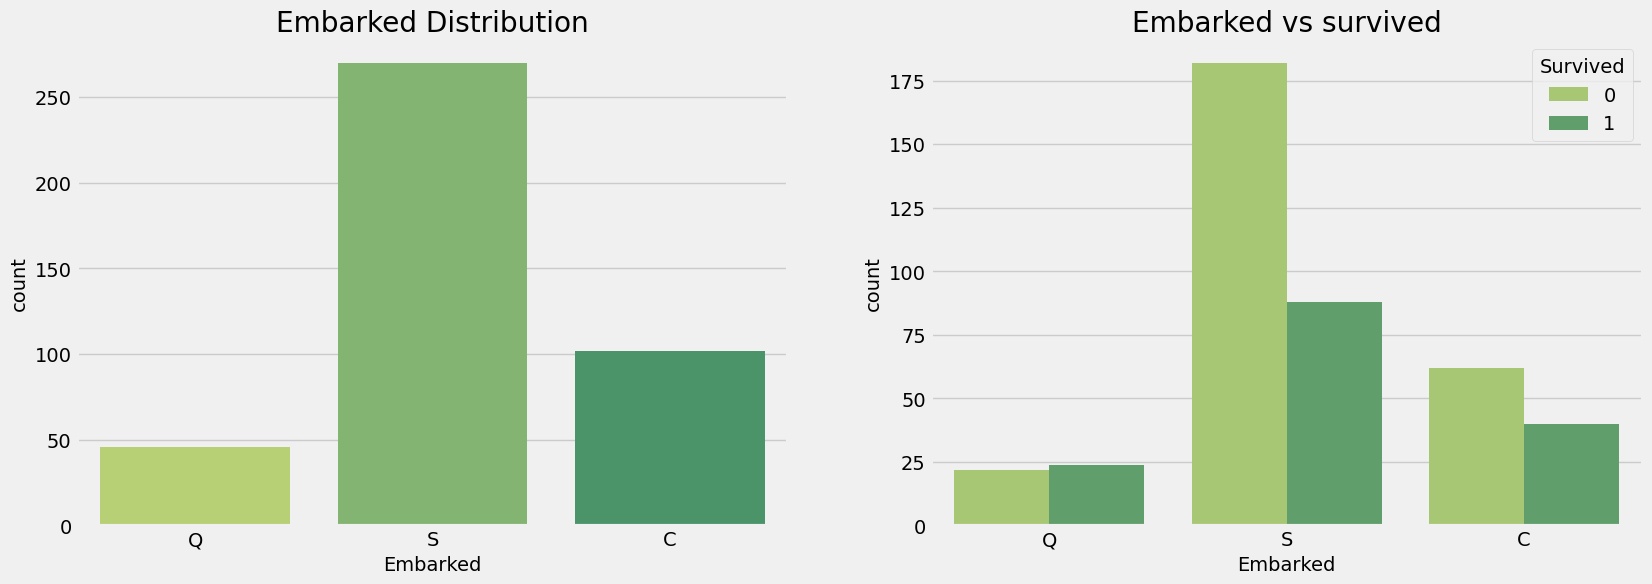

In [30]:
f,ax=plt.subplots(1,2,figsize=(18,6))
sns.countplot(x='Embarked', data=tiatanic_df,palette='summer_r',  ax =ax[0])
ax[0].set_title('Embarked Distribution')
sns.countplot(x='Embarked', hue ='Survived', data = tiatanic_df, palette='summer_r', ax=ax[1])
ax[1].set_title('Embarked vs survived')
plt.show()

from the above distribution we can see that we have more population that embarked at S with more deceased rate compared to survived rate and some of passengers embarked at C with also a little above deceased rate compared to survived rate and the people that embarked at Q had the lowest amount of passengers had a high rate of survivors compared to deceased


In [31]:
pd.crosstab(tiatanic_df.Embarked,tiatanic_df.Pclass).style.background_gradient('summer_r')

Text(0.5, 1.0, 'Pclass, Embarked vs Survived')

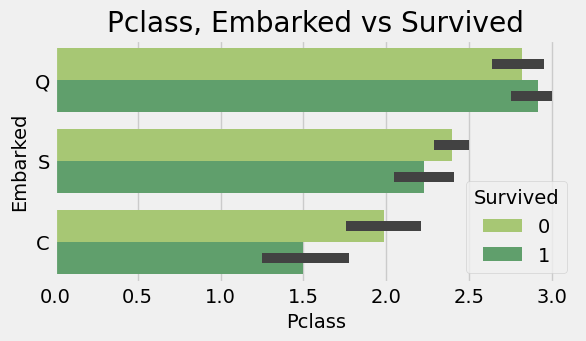

In [32]:
plt.figure(figsize=(6,3))
sns.barplot(x = 'Pclass',y ='Embarked', data =tiatanic_df,hue='Survived', palette='summer_r').set_title('Pclass, Embarked vs Survived')

<Axes: >

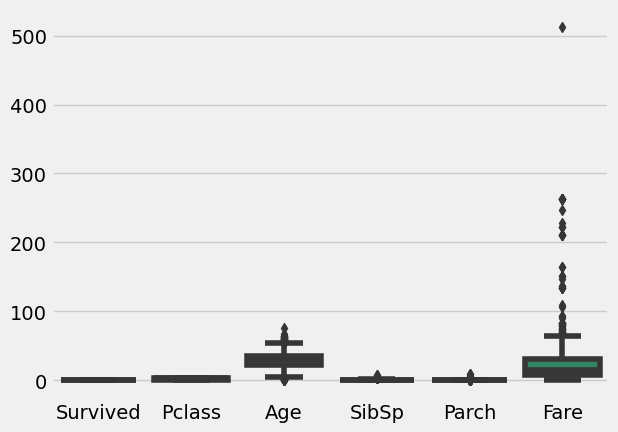

In [13]:
sns.boxplot(data = tiatanic_df, palette ='summer_r')

<Axes: xlabel='Age'>

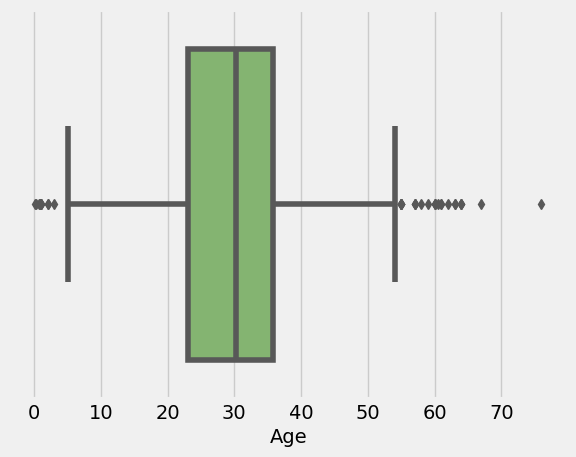

In [12]:
### lastly we will check for any outlier
sns.boxplot(data = tiatanic_df, x = 'Age' ,palette= 'summer_r')


In [16]:
Q1 = np.percentile(tiatanic_df['Age'], 25, interpolation = 'midpoint')
Q3 = np.percentile(tiatanic_df['Age'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
print('Old shape:', tiatanic_df.shape)
# UPPER
upper = np.where(tiatanic_df['Age'] >= (Q3+1.5*IQR))
# LOWER
lower = np.where(tiatanic_df['Age'] <= (Q1-1.5*IQR))
tiatanic_df.drop(upper[0], inplace = True)
tiatanic_df.drop(lower[0], inplace= True)
print('New shape:', tiatanic_df.shape)

Old shape: (418, 8)
New shape: (382, 8)


<Axes: xlabel='Age'>

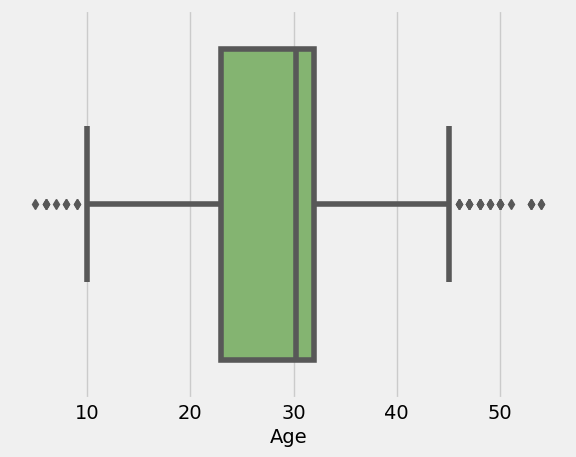

In [17]:
sns.boxplot(data = tiatanic_df, x = 'Age' ,palette= 'summer_r')


<Axes: xlabel='SibSp'>

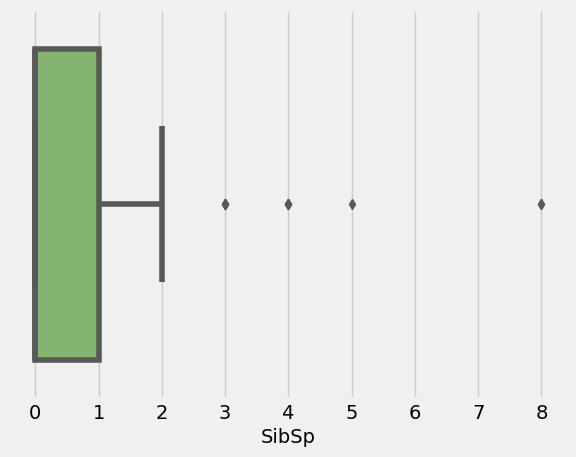

In [14]:
sns.boxplot(data = tiatanic_df, x='SibSp', palette='summer_r')

<Axes: xlabel='Parch'>

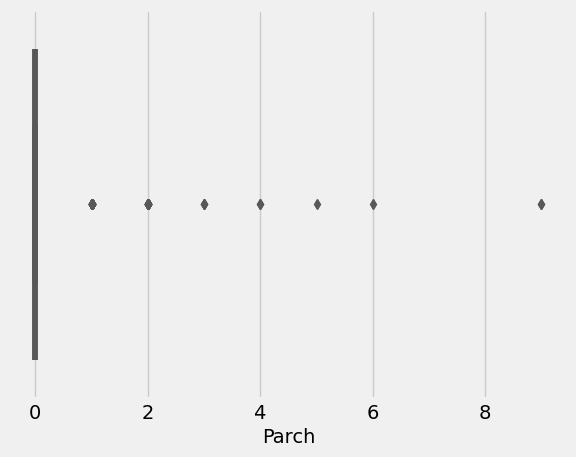

In [15]:
sns.boxplot(data = tiatanic_df, x ='Parch', palette='summer_r')

## Data modelling

In [29]:
#conversion from categorical data to numerical data using the mapping function
tiatanic_df['Sex']= tiatanic_df['Sex'].map({'female':1,'male':0})

In [30]:
tiatanic_df['Embarked']= tiatanic_df['Embarked'].map({'S' :0,'C':1,'Q':2})


In [36]:
tiatanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    int64  
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      417 non-null    float64
 7   Embarked  418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


In [22]:
y=tiatanic_df['Survived']
X=tiatanic_df.drop(['Survived','Fare'] , axis = 1)


In [23]:
X

Pclass     Sex       Age  SibSp  Parch Embarked
0         3    male  34.50000      0      0        Q
1         3  female  47.00000      1      0        S
3         3    male  27.00000      0      0        S
4         3  female  22.00000      1      1        S
5         3    male  14.00000      0      0        S
..      ...     ...       ...    ...    ...      ...
413       3    male  30.27259      0      0        S
414       1  female  39.00000      0      0        C
415       3    male  38.50000      0      0        S
416       3    male  30.27259      0      0        S
417       3    male  30.27259      1      1        C

[382 rows x 6 columns]

In [24]:
y

0      0
1      1
3      0
4      1
5      0
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 382, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=42)

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
le= LogisticRegression()

In [35]:
le.fit(X_train,y_train)

ValueError: could not convert string to float: 'female'

In [45]:
pred=le.predict(X_test)

In [46]:
from sklearn.metrics  import accuracy_score

In [47]:
accuracy_score = accuracy_score(y_test, pred)*100

In [48]:
print('accurracy score is' ,accuracy_score)

accurracy score is 100.0


In [49]:
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier

In [50]:
gbc = GradientBoostingClassifier()

In [51]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [52]:
pred = gbc.predict(X_test)

In [53]:
from sklearn.metrics  import accuracy_score

In [54]:
accuracy_score = accuracy_score(y_test, pred)*100

In [55]:
print('Accuracy score is', accuracy_score)

Accuracy score is 100.0


In [56]:
rfc = RandomForestClassifier()

In [57]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [58]:
pred= rfc.predict(X_test)

In [59]:
from sklearn.metrics  import accuracy_score

In [60]:
accuracy_score = accuracy_score(y_test, pred)*100

In [61]:
print('Accuracy score is', accuracy_score)

Accuracy score is 100.0


In [62]:
### we will use logistic regression as the model
import pickle

In [64]:
pickle_out=open('logisticregression.pkl', 'wb')
pickle.dump(le, pickle_out)
pickle_out.close()

In [65]:
pwd

'C:\\Users\\Dell\\codsoft 1'